data 1 
CarPrice Prediction MLR+RFE+VIF

https://www.kaggle.com/code/hellbuoy/carprice-prediction-mlr-rfe-vif/notebook
    

data 2

US Cars Dataset
Online Car Auction in North American

https://www.kaggle.com/datasets/doaaalsenani/usa-cers-dataset

Context
US Cars'data was scraped from AUCTION EXPORT.com. This dataset included Information about 28 brands of clean and used vehicles for sale in US. Twelve features were assembled for each car in the dataset.

Content
This dataset includes 12 features:


2 help 
https://www.kaggle.com/code/tanersekmen/us-car-data-analysis-eda-visualization/data
    

## Intial Requirements

In [1]:
#install library to check missing values
!pip install missingno

In [2]:
#importing libraries
import pandas as pd
import matplotlib.pylab as plt
import missingno as msno
import seaborn as sns
import time
import re
print('Pandas',pd.__version__)

Pandas 1.3.4


In [3]:
#note the start time of the propram
start_time = time.time()

## Dataset 1

In [4]:
'''#read the data file
url = 'https://raw.githubusercontent.com/alishaminj12/data601/main/Final/CarPrice_Assignment.csv?token=GHSAT0AAAAAABRCQXP3DGYM3JJ2VR24SK5YYUDPAGQ'
Car = pd.read_csv(url, encoding='latin1')
Car.head()'''

"#read the data file\nurl = 'https://raw.githubusercontent.com/alishaminj12/data601/main/Final/CarPrice_Assignment.csv?token=GHSAT0AAAAAABRCQXP3DGYM3JJ2VR24SK5YYUDPAGQ'\nCar = pd.read_csv(url, encoding='latin1')\nCar.head()"

In [5]:
 #read the data file
Car = pd.read_csv('CarPrice_Assignment.csv')
Car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
#check the number of rows and columns in the dataframe
Car.shape

(205, 26)

## CleanUp, Sanity check and removal of Data Inconsistencies

In [7]:
#Find number of non-null values and data type of each column in the dataframe
Car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
# describe of the data
Car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Now we check whether there are any columns that have same value for all the rows

In [9]:
counter = 0
for this_column in Car.columns:
    if (Car[this_column].nunique()==1):
        print(this_column)
        counter = 1
if(counter != 1):
    print('There are no such columns having the same value for all the rows.')

There are no such columns having the same value for all the rows.


Now lets get the number of uniques values per column and their counts

In [10]:
#function to number of unique values and its count for all columns in a data frame
def uniq_per_col(df,count):
    for this_column in df.columns:
        print("==== ",this_column,"has",df[this_column].nunique(),"unique entries ====")
        print(df[this_column].value_counts().head(count))

In [11]:
uniq_per_col(Car,5)

====  car_ID has 205 unique entries ====
1      1
142    1
132    1
133    1
134    1
Name: car_ID, dtype: int64
====  symboling has 6 unique entries ====
 0    67
 1    54
 2    32
 3    27
-1    22
Name: symboling, dtype: int64
====  CarName has 147 unique entries ====
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
Name: CarName, dtype: int64
====  fueltype has 2 unique entries ====
gas       185
diesel     20
Name: fueltype, dtype: int64
====  aspiration has 2 unique entries ====
std      168
turbo     37
Name: aspiration, dtype: int64
====  doornumber has 2 unique entries ====
four    115
two      90
Name: doornumber, dtype: int64
====  carbody has 5 unique entries ====
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
====  drivewheel has 3 unique entries ====
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
====  eng

Now lets find the percentage of null values in each column

In [12]:
Car.isnull().sum()/len(Car)*100  

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

From the above observation it is clear that, we have a good variety of data and have eliminated various data inconsistencies that would be there. We have minimal null values in the data. Hence we can conclude that we have good data. But we still can work on the data types of object type columns.

In [13]:
#find number of unique values in various object type columns
count = 10
for col,col_type in Car.dtypes.iteritems():
    if(col_type=='object'):
        print('\n',col,'has',Car[col].nunique(),'unique entries; and the top unique values are ')
        print(Car[col].value_counts().head(count))


 CarName has 147 unique entries; and the top unique values are 
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
mazda 626               3
toyota mark ii          3
mitsubishi outlander    3
mitsubishi g4           3
honda civic             3
Name: CarName, dtype: int64

 fueltype has 2 unique entries; and the top unique values are 
gas       185
diesel     20
Name: fueltype, dtype: int64

 aspiration has 2 unique entries; and the top unique values are 
std      168
turbo     37
Name: aspiration, dtype: int64

 doornumber has 2 unique entries; and the top unique values are 
four    115
two      90
Name: doornumber, dtype: int64

 carbody has 5 unique entries; and the top unique values are 
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

 drivewheel has 3 unique entries; and the top unique values are 
fwd    120
rwd     76
4wd      9
Na

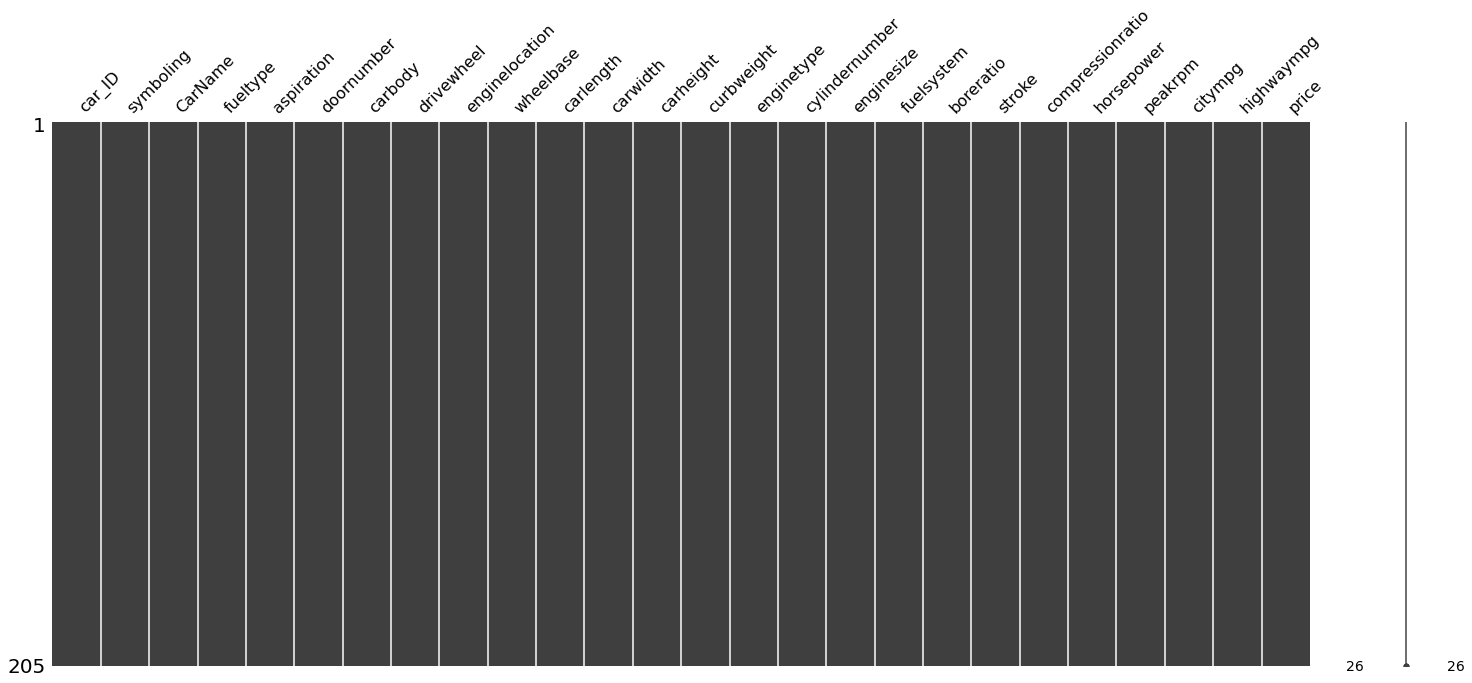

In [14]:
#Black = filled; white = empty
_=msno.matrix(Car.sample(Car.shape[0]))

In [15]:
# Extracting Car Company from the CarName as per direction in Problem 
Car['CarName'] = Car.CarName.str.split(' ',1).tolist()
Car['Brand'] = Car['CarName'].str[0]
Car['Model'] = Car['CarName'].str[1]
Car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand,Model
0,1,3,"[alfa-romero, giulia]",gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,"[alfa-romero, stelvio]",gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,"[alfa-romero, Quadrifoglio]",gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,"[audi, 100 ls]",gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,"[audi, 100ls]",gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [16]:
# dropping car_ID based on business knowledge
Car = Car.drop('car_ID',axis=1)
#Car = Car.drop('CarName',axis=1)

In [17]:
Car.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand,Model
0,3,"[alfa-romero, giulia]",gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,"[alfa-romero, stelvio]",gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,"[alfa-romero, Quadrifoglio]",gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2,"[audi, 100 ls]",gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,"[audi, 100ls]",gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [18]:
Car.rename(columns={ "symboling":"Symboling", "price": "Price", "fueltype": "Fueltype","carbody":"Category"}, inplace =True)

In [19]:
Car['Brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

### Typo Error in Car Company name

- maxda = mazda
- Nissan = nissan
- porsche = porcshce
- toyota = toyouta
- vokswagen = volkswagen = vw

In [20]:
# Renaming the typo errors in Car Company names

Car['Brand'] = Car['Brand'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [21]:
# changing the datatype of symboling as it is categorical variable as per dictionary file

Car['Symboling'] = Car['Symboling'].astype(str)

In [22]:
Car.head()

,Symboling,CarName,Fueltype,aspiration,doornumber,Category,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,Price,Brand,Model
0,3,"[alfa-romero, giulia]",gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,"[alfa-romero, stelvio]",gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,"[alfa-romero, Quadrifoglio]",gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2,"[audi, 100 ls]",gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,"[audi, 100ls]",gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


## Dataset 2

In [23]:
#read the data file
Auction = pd.read_csv('USA_cars_datasets.csv')
Auction.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [24]:
#check the number of rows and columns in the dataframe
Auction.shape

(2499, 13)

## CleanUp, Sanity check and removal of Data Inconsistencies

In [25]:
#Find number of non-null values and data type of each column in the dataframe
Auction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


In [26]:
# describe of the data
Auction.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


Now we check whether there are any columns that have same value for all the rows

In [27]:
counter = 0
for this_column in Auction.columns:
    if (Auction[this_column].nunique()==1):
        print(this_column)
        counter = 1
if(counter != 1):
    print('There are no such columns having the same value for all the rows.')

There are no such columns having the same value for all the rows.


Now lets get the number of uniques values per column and their counts

In [28]:
#function to number of unique values and its count for all columns in a data frame
def uniq_per_col(df,count):
    for this_column in df.columns:
        print("==== ",this_column,"has",df[this_column].nunique(),"unique entries ====")
        print(df[this_column].value_counts().head(count))

In [29]:
uniq_per_col(Auction,5)

====  Unnamed: 0 has 2499 unique entries ====
0       1
1669    1
1662    1
1663    1
1664    1
Name: Unnamed: 0, dtype: int64
====  price has 790 unique entries ====
0        43
16500    26
13900    21
15500    19
15000    19
Name: price, dtype: int64
====  brand has 28 unique entries ====
ford         1235
dodge         432
nissan        312
chevrolet     297
gmc            42
Name: brand, dtype: int64
====  model has 127 unique entries ====
door       651
f-150      219
doors      148
caravan    102
mpv         87
Name: model, dtype: int64
====  year has 30 unique entries ====
2019    892
2018    395
2017    377
2016    203
2015    196
Name: year, dtype: int64
====  title_status has 2 unique entries ====
clean vehicle        2336
salvage insurance     163
Name: title_status, dtype: int64
====  mileage has 2439 unique entries ====
1.0        11
0.0         6
31727.0     2
33808.0     2
21774.0     2
Name: mileage, dtype: int64
====  color has 49 unique entries ====
white     707
blac

Now lets find the percentage of null values in each column


In [30]:
Car.isnull().sum()/len(Car)*100

Symboling           0.00000
CarName             0.00000
Fueltype            0.00000
aspiration          0.00000
doornumber          0.00000
Category            0.00000
drivewheel          0.00000
enginelocation      0.00000
wheelbase           0.00000
carlength           0.00000
carwidth            0.00000
carheight           0.00000
curbweight          0.00000
enginetype          0.00000
cylindernumber      0.00000
enginesize          0.00000
fuelsystem          0.00000
boreratio           0.00000
stroke              0.00000
compressionratio    0.00000
horsepower          0.00000
peakrpm             0.00000
citympg             0.00000
highwaympg          0.00000
Price               0.00000
Brand               0.00000
Model               0.97561
dtype: float64

From the above observation it is clear that, we have a good variety of data and have eliminated various data inconsistencies that would be there. We have minimal null values in the data. Hence we can conclude that we have good data. But we still can work on the data types of object type columns.

In [31]:
#find number of unique values in various object type columns
count = 10
for col,col_type in Auction.dtypes.iteritems():
    if(col_type=='object'):
        print('\n',col,'has',Auction[col].nunique(),'unique entries; and the top unique values are ')
        print(Auction[col].value_counts().head(count))


 brand has 28 unique entries; and the top unique values are 
ford         1235
dodge         432
nissan        312
chevrolet     297
gmc            42
jeep           30
chrysler       18
bmw            17
hyundai        15
kia            13
Name: brand, dtype: int64

 model has 127 unique entries; and the top unique values are 
door       651
f-150      219
doors      148
caravan    102
mpv         87
fusion      65
durango     64
journey     61
rogue       54
van         46
Name: model, dtype: int64

 title_status has 2 unique entries; and the top unique values are 
clean vehicle        2336
salvage insurance     163
Name: title_status, dtype: int64

 color has 49 unique entries; and the top unique values are 
white       707
black       516
gray        395
silver      300
red         192
blue        151
no_color     61
green        24
orange       20
gold         19
Name: color, dtype: int64

 vin has 2495 unique entries; and the top unique values are 
  1gnevhkw8jj148388    2
  1gn

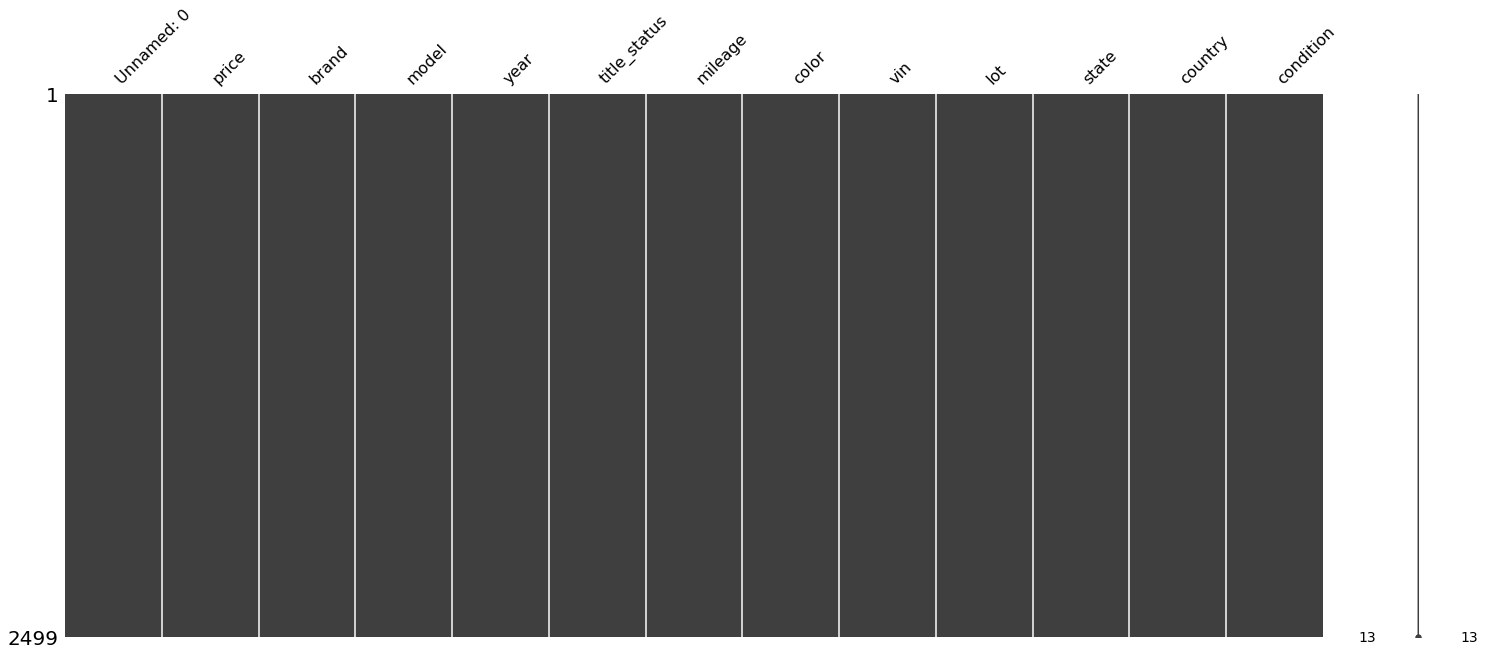

In [32]:
#Black = filled; white = empty
_=msno.matrix(Auction.sample(Auction.shape[0]))      


The dataset includes 13 features of 2499 cars. Some of the features are important when determining the price of a car while some are redundant. For example, “vin”, “lot” and “Unnamed: 0” columns have no effect on the price. These three columns represent kind of an ID for a car. Since the dataset is taken from a website in US, I think the country column only includes “usa”. Let’s check:

In [33]:
Auction.country.value_counts()

 usa       2492
 canada       7
Name: country, dtype: int64

Not all but overwhelming majority is “usa” so there is no point in using “country” column as a feature in our model. So the columns that we will not use in the model are "Unnamed, vin, lot, country" so lets drop them.

In [34]:
Auction.drop(['Unnamed: 0','vin', 'lot','country'], axis=1, inplace=True)
Auction.head()

,price,brand,model,year,title_status,mileage,color,state,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,22 hours left


In [35]:
Auction.title_status.value_counts()

clean vehicle        2336
salvage insurance     163
Name: title_status, dtype: int64

In [36]:
Auction['model'].unique()

array(['cruiser', 'se', 'mpv', 'door', '1500', 'pk', 'malibu', 'coupe',
       'wagon', 'forte', 'encore', 'sorento', 'doors', 'chassis', 'q70',
       'camaro', 'convertible', 'vans', 'srw', 'compass', 'enclave',
       '300', 'cherokee', 'pacifica', 'x3', 'equinox', 'challenger', 'm',
       'colorado', 'focus', 'durango', 'escape', 'charger', 'explorer',
       'f-150', '3500', 'caravan', 'van', 'dart', '2500', 'esv',
       'cutaway', 'el', 'edge', 'series', 'flex', 'srx', 'cab', 'pickup',
       'vehicl', 'trax', 'tahoe', 'suburban', 'cargo', 'drw', 'fiesta',
       'impala', 'soul', 'elantra', 'pioneer', 'trail', 'traverse',
       'country', 'sundance', 'road/street', 'nautilus', 'gx', 'q5',
       'gle', 'sportage', '5', 'sport', 'discovery', 'acadia', 'ghibli',
       'glc', 'e-class', 'truck', 'utility', 'limited', 'sl-class',
       'cx-3', '2500hd', 'sonic', 'corvette', 'mdx', 'xt5', 'fusion',
       'mustang', 'passenger', 'volt', 'spark', 'cruze', 'ld', 'journey',
       

In [37]:
def generalise(data):
    dic = {"sedan":["cruiser","forte", "q70", "camaro", "300", "challenger", "focus", "charger", "dart","el", "series", "vehicle", "fiesta", "impala", "elantra", "ghibli", "e-class", "versa", "fusion", "sonic", "cruze", "energi", "Taurus", "hybrid", "sentra",
            "altima", "maxima", "sentra", "versa","sedan","charger","dart","vehicl","impala"],
           "truck" :["1500", "colorado","pickup", "f-150", "3500", "2500", "2500hd", "ranger", "f-750", "f-650", "frontier", "d", "dr", "titan", "utility", "limited", "ld","truck"], 
           "sport car":['sl-class','sport'],                        
           "convertible":["malibu","convertible"], 
           "hatchback":["Mpv","mpv" "volt", "spark", "note", "max"], 
           "suv":["se", "encore", "sorento", "compass", "enclave", "cherokee", "x3", "equinox", "durango", "escape", "explorer", "esv", "edge", "srx", "trax", "tahoe", 
                "suburban", "soul", "traverse", "nautilus", "gx", "q5", "gle", "sportage", "sport", "discovery", "acadia", "glc", "juke", "utility", "xt5", "mdx", "cx-3", 
                "expedition", "ecosport", "murano","durango", "rogue", "armada", "pathfinder", "xd", "kicks", "murano", "xterra","ecosport", "journey", "passenger","suv"],
           "wagon":["flex", "transit","wagon"], 
            "door":["Doors","door","doors"],
           "coupe":["m", "5", "corvette", "mustang","coupe","camaro","challenger"],
           "vans":["pacifica", "caravan", "connect", "nvp", "passenger","mpv","vans","van"],
           "cargo":["bus","cargo","cutaway"],
           "trailers":["pioneer", "trail", "country", "sundance","trailer"],
            "motorcycle":["road/street"],
           "pk":["pk"],
           "swr":["swr"],
           "cab":["cab"]
}
    Category = []
    for d in data:
        done = False
        for categ in dic.keys():
            if d in dic[categ]:
                Category.append(categ)
                done = True
                break
        if not done:
            Category.append("NA")
    return Category

Auction['Category'] = generalise(Auction['model'])
Auction
            

,price,brand,model,year,title_status,mileage,color,state,condition,Category
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,10 days left,sedan
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,6 days left,suv
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,2 days left,vans
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,22 hours left,door
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,22 hours left,truck
...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,california,1 days left,sedan
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,florida,21 hours left,sedan
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,florida,21 hours left,sedan
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,florida,2 days left,sedan


In [38]:
Auction.rename(columns={ "price":"AuctionPrice", "brand": "Brand", "model": "Model", "year": "Year", "title_status": "Title_Status", "mileage": "Mileage", "color": "Color", "state": "State", "condition": "Condition", "country":"Country"}, inplace =True)

In [39]:
Auction.head()

,AuctionPrice,Brand,Model,Year,Title_Status,Mileage,Color,State,Condition,Category
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,10 days left,sedan
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,6 days left,suv
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,2 days left,vans
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,22 hours left,door
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,22 hours left,truck


## Merge the Dataset

In [40]:
Car_Data = pd.merge(Auction, Car, how ='inner', on= ['Brand'])

In [41]:
Car_Data

,AuctionPrice,Brand,Model_x,Year,Title_Status,Mileage,Color,State,Condition,Category_x,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,Price,Model_y
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,10 days left,sedan,...,2bbl,3.05,3.03,9.0,62,4800,35,39,5348.000,corona mark ii
1,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,10 days left,sedan,...,2bbl,3.05,3.03,9.0,62,4800,31,38,6338.000,corona
2,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,10 days left,sedan,...,2bbl,3.05,3.03,9.0,62,4800,31,38,6488.000,corolla 1200
3,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,10 days left,sedan,...,2bbl,3.05,3.03,9.0,62,4800,31,37,6918.000,corona hardtop
4,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,10 days left,sedan,...,2bbl,3.05,3.03,9.0,62,4800,27,32,7898.000,corolla 1600 (sw)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5267,36400,audi,5,2015,clean vehicle,47213.0,black,wisconsin,2 days left,coupe,...,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000,fox
5268,36400,audi,5,2015,clean vehicle,47213.0,black,wisconsin,2 days left,coupe,...,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000,100ls
5269,36400,audi,5,2015,clean vehicle,47213.0,black,wisconsin,2 days left,coupe,...,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000,5000
5270,36400,audi,5,2015,clean vehicle,47213.0,black,wisconsin,2 days left,coupe,...,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000,4000


In [42]:
Car_Data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5272 entries, 0 to 5271
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AuctionPrice      5272 non-null   int64  
 1   Brand             5272 non-null   object 
 2   Model_x           5272 non-null   object 
 3   Year              5272 non-null   int64  
 4   Title_Status      5272 non-null   object 
 5   Mileage           5272 non-null   float64
 6   Color             5272 non-null   object 
 7   State             5272 non-null   object 
 8   Condition         5272 non-null   object 
 9   Category_x        5272 non-null   object 
 10  Symboling         5272 non-null   object 
 11  CarName           5272 non-null   object 
 12  Fueltype          5272 non-null   object 
 13  aspiration        5272 non-null   object 
 14  doornumber        5272 non-null   object 
 15  Category_y        5272 non-null   object 
 16  drivewheel        5272 non-null   object 


In [43]:
Car_Data.drop(['Condition','fuelsystem', 'boreratio','stroke','horsepower','citympg',
               'highwaympg','enginetype','cylindernumber','enginesize'],axis=1,inplace=True)
               

Car_Data.head()

,AuctionPrice,Brand,Model_x,Year,Title_Status,Mileage,Color,State,Category_x,Symboling,...,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,compressionratio,peakrpm,Price,Model_y
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,sedan,1,...,front,95.7,158.7,63.6,54.5,1985,9.0,4800,5348.0,corona mark ii
1,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,sedan,1,...,front,95.7,158.7,63.6,54.5,2040,9.0,4800,6338.0,corona
2,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,sedan,1,...,front,95.7,158.7,63.6,54.5,2015,9.0,4800,6488.0,corolla 1200
3,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,sedan,0,...,front,95.7,169.7,63.6,59.1,2280,9.0,4800,6918.0,corona hardtop
4,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,sedan,0,...,front,95.7,169.7,63.6,59.1,2290,9.0,4800,7898.0,corolla 1600 (sw)


In [44]:
Car_Data.drop(['enginelocation','wheelbase', 'Symboling','carlength','carwidth','carheight',
               'curbweight','compressionratio'],axis=1,inplace=True)
               

Car_Data.head()

,AuctionPrice,Brand,Model_x,Year,Title_Status,Mileage,Color,State,Category_x,CarName,Fueltype,aspiration,doornumber,Category_y,drivewheel,peakrpm,Price,Model_y
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,sedan,"[toyota, corona mark ii]",gas,std,two,hatchback,fwd,4800,5348.0,corona mark ii
1,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,sedan,"[toyota, corona]",gas,std,two,hatchback,fwd,4800,6338.0,corona
2,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,sedan,"[toyota, corolla 1200]",gas,std,four,hatchback,fwd,4800,6488.0,corolla 1200
3,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,sedan,"[toyota, corona hardtop]",gas,std,four,wagon,fwd,4800,6918.0,corona hardtop
4,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,sedan,"[toyota, corolla 1600 (sw)]",gas,std,four,wagon,4wd,4800,7898.0,corolla 1600 (sw)


In [45]:
Car_Data.drop(['CarName'],axis=1,inplace=True)
Car_Data.head()

,AuctionPrice,Brand,Model_x,Year,Title_Status,Mileage,Color,State,Category_x,Fueltype,aspiration,doornumber,Category_y,drivewheel,peakrpm,Price,Model_y
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,sedan,gas,std,two,hatchback,fwd,4800,5348.0,corona mark ii
1,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,sedan,gas,std,two,hatchback,fwd,4800,6338.0,corona
2,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,sedan,gas,std,four,hatchback,fwd,4800,6488.0,corolla 1200
3,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,sedan,gas,std,four,wagon,fwd,4800,6918.0,corona hardtop
4,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,sedan,gas,std,four,wagon,4wd,4800,7898.0,corolla 1600 (sw)


## Visualizations

In [46]:
Car_Data['Brand'].unique()

array(['toyota', 'dodge', 'chevrolet', 'buick', 'bmw', 'mazda', 'honda',
       'jaguar', 'audi'], dtype=object)

Text(0.5, 1.0, 'Number of Car Brands')

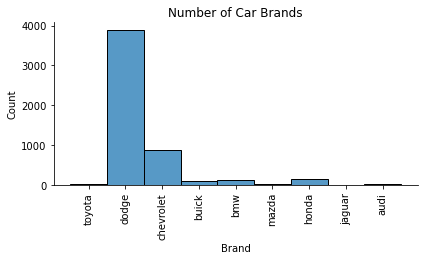

In [47]:
plot = sns.displot(data = Car_Data, x= 'Brand', kind = 'hist', height=3 ,aspect=2)
plot.ax.set_xticks(Car_Data['Brand'].unique())
plot.ax.tick_params(axis = 'x', labelrotation = 90)
plot.ax.set_title("Number of Car Brands")

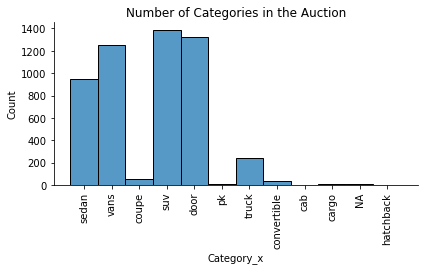

In [48]:
plot = sns.displot(data = Car_Data, x= 'Category_x', kind = 'hist', height=3 ,aspect=2)
plot.ax.set_title("Number of Categories in the Auction")
plot.ax.set_xticks(Car_Data['Category_x'].sort_values().unique())
plot.ax.tick_params(axis = 'x', labelrotation = 90)

Text(0.5, 1.0, 'Popular Brand and Model')

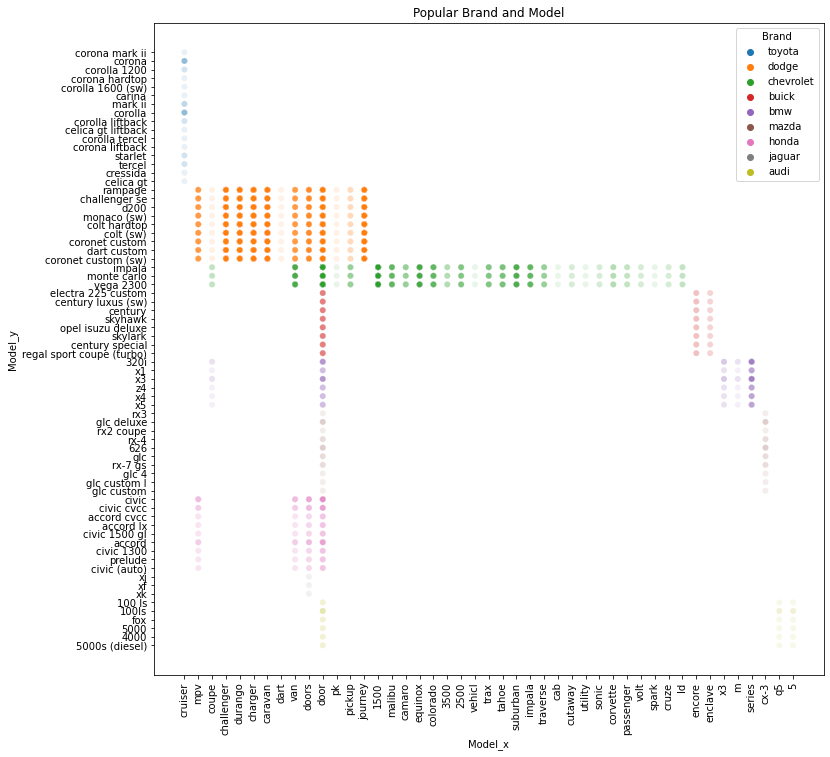

In [49]:
plot = sns.scatterplot(x= Car_Data['Model_x'], y = Car_Data['Model_y'], hue = Car_Data['Brand'], alpha = 0.1, sizes=(900, 900))
plot.axes.tick_params(axis = 'x', labelrotation = 90)
fig = plt.gcf()
fig.set_size_inches(12, 12)
plot.axes.set_title("Popular Brand and Model")

Text(0.5, 1.0, 'Primary factor for every Collision type')

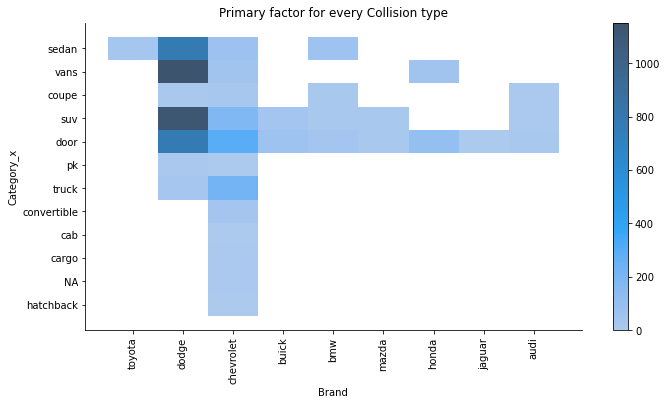

In [50]:
plot = sns.displot(Car_Data, x="Brand", y="Category_x", cbar = True, aspect = 2)
plot.ax.tick_params(axis = 'x', labelrotation = 90)
plot.ax.set_title("Primary factor for every Collision type")

Text(0.5, 1.0, 'Auction at states')

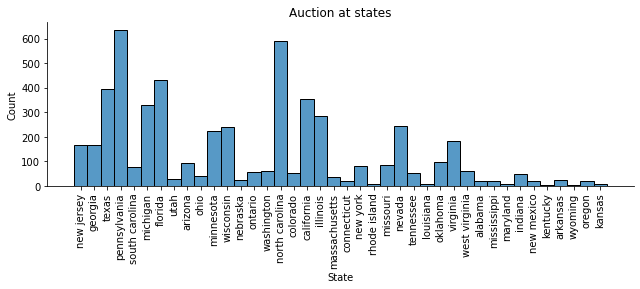

In [51]:
plot = sns.displot(data = Car_Data, x= 'State', kind = 'hist', height=3 ,aspect=3)
plot.ax.set_xticks(Car_Data['State'].unique())
plot.ax.tick_params(axis = 'x', labelrotation = 90)
plot.ax.set_title("Auction at states")

Text(0.5, 1.0, 'Primary factor for every Collision type')

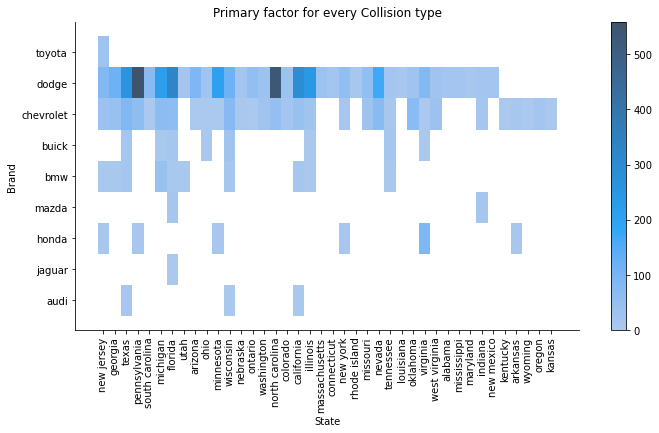

In [52]:
plot = sns.displot(Car_Data, x="State", y="Brand", cbar = True, aspect = 2)
plot.ax.tick_params(axis = 'x', labelrotation = 90)
plot.ax.set_title("Primary factor for every Collision type")

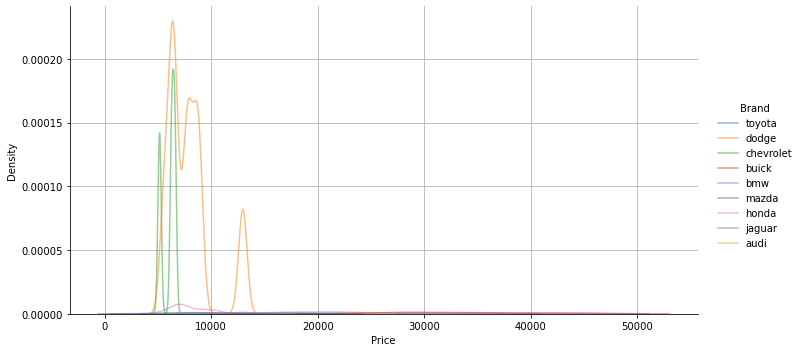

In [53]:
# is this understandable? what do you understand from this graph?
plot= sns.displot(data=Car_Data, kind="kde", x="Price", hue = "Brand", aspect=2, alpha=0.5)
plot.ax.grid()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


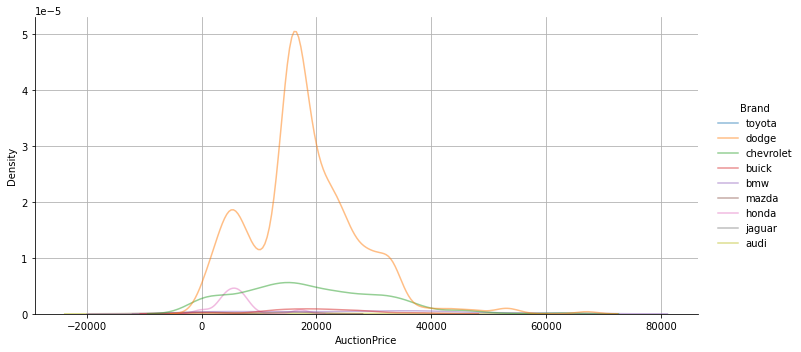

In [54]:
plot= sns.displot(data=Car_Data, kind="kde", x="AuctionPrice", hue = "Brand", aspect=2, alpha=0.5)
plot.ax.grid()

In [55]:
multiple_grouped = Car_Data\
    .groupby(['Brand','Category_x']) \
    .agg({'Price':'mean','AuctionPrice':'mean'})

multiple_grouped

Price  AuctionPrice
Brand     Category_x                             
audi      coupe        17859.166714  36400.000000
          door         17859.166714     12.500000
          suv          17859.166714  19500.000000
bmw       coupe        26118.750000  27662.500000
          door         26118.750000   9725.000000
          sedan        26118.750000  36962.500000
          suv          26118.750000  24550.000000
buick     door         33647.000000  18575.625000
          suv          33647.000000  21540.000000
chevrolet NA            6007.000000  16550.000000
          cab           6007.000000  10440.000000
          cargo         6007.000000  16100.000000
          convertible   6007.000000  13533.583333
          coupe         6007.000000  30717.142857
          door          6007.000000  12314.212121
          hatchback     6007.000000   7200.000000
          pk            6007.000000   7300.000000
          sedan         6007.000000  16144.565217
          suv           6007.000000  24155.000000
          truck         6007.000000  24388.277778
          vans          6007.000000  16566.176471
dodge     coupe         7875.444444  10400.000000
          door          7875.444444  10308.241379
          pk            7875.444444   1400.000000
          sedan         7875.444444  24685.425287
          suv           7875.444444  22605.200000
          truck         7875.444444   9366.666667
          vans          7875.444444  13842.343750
honda     door          8184.692308   4540.000000
          vans          8184.692308   9302.500000
jaguar    door         34600.000000   2800.000000
mazda     door         10652.882353      0.000000
          suv          10652.882353  16000.000000
toyota    sedan         9885.812500   6300.000000

In [56]:
'''

column_names = ["C", "A", "B"]

df = df.reindex(columns=column_names)

'''

'\n\ncolumn_names = ["C", "A", "B"]\n\ndf = df.reindex(columns=column_names)\n\n'

In [57]:
column_names = ["Brand", "Category", "Year", "Price", "AuctionPrice","Color","State"]

Car_Datas = Car_Data.reindex(columns=column_names)


In [58]:
Car_Datas

,Brand,Category,Year,Price,AuctionPrice,Color,State
0,toyota,NaN,2008,5348.000,6300,black,new jersey
1,toyota,NaN,2008,6338.000,6300,black,new jersey
2,toyota,NaN,2008,6488.000,6300,black,new jersey
3,toyota,NaN,2008,6918.000,6300,black,new jersey
4,toyota,NaN,2008,7898.000,6300,black,new jersey
...,...,...,...,...,...,...,...
5267,audi,NaN,2015,15250.000,36400,black,wisconsin
5268,audi,NaN,2015,17710.000,36400,black,wisconsin
5269,audi,NaN,2015,18920.000,36400,black,wisconsin
5270,audi,NaN,2015,23875.000,36400,black,wisconsin


<Figure size 432x288 with 0 Axes>

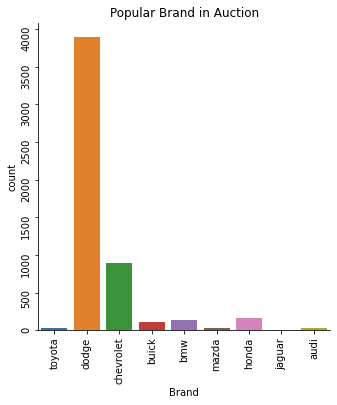

<Figure size 432x288 with 0 Axes>

In [59]:
## we can use catplot for showing the count
plot = sns.catplot(data= Car_Data, kind = 'count', x = 'Brand')
plot.ax.set_title('Popular Brand in Auction')
plot.ax.tick_params(labelrotation = 90)
#Car_Data.sort_values('Brand')

plt.figure()


In [60]:
plt.figure(figsize=(10,6))
# make barplot and sort bars
sns.barplot(x='Brand',
            y='count', 
            data=Car_Data, 
            order=Car_Data.sort_values('Salary').Education)
# set labels
plt.xlabel("Education", size=15)
plt.ylabel("Salary in US Dollars", size=15)
plt.title("Sort Bars in Barplot in Ascending Order", size=18)
plt.tight_layout()
plt.savefig("sort_bars_in_barplot_ascending_order_Seaborn_Python.png", dpi=100)

KeyError: 'Salary'

<Figure size 720x432 with 0 Axes>

In [ ]:


grouped_by_Brand = Car_Data.groupby('Brand').agg(
    #Model = ('Model_x', 'count') , 
    Brand_Price= ('Price', 'mean') ,
    Brand_Auction = ('AuctionPrice', 'mean')
    )
grouped_by_Brand

In [ ]:
Car_Data.groupby('Brand')